#  Classification model for predicting customer churn for SyriaTel


# Business Understanding
SyriaTel, a telecommunications company, is experiencing customer churn, which means customers are stopping their service and going to competitors. This leads to lost revenue and potential decline in market share. It wants to reduce customer churn to increase their revenue and customer retention. By predicting which customers are likely to leave, SyriaTel can take proactive measures to retain them.

## Problem Statement
SyriaTel wants to reduce customer churn to increase their revenue and customer retention. By predicting which customers are likely to leave, SyriaTel can take proactive measures to retain them.

## Objectives
1. To develop a churn prediction model that accurately predicts customers at a high risk of churning,
2. To identify key factors influencing churn.
3. To reduce customer churn rate.

## Metrics of Success
- Accuracy: The percentage of correctly predicted churned and non-churned customers.
- Precision: The proportion of customers predicted to churn who actually churn.
- Recall: The proportion of actual churned customers identified by the model.
- F1-score: A harmonic mean of precision and recall, balancing both metrics.

## Conclusion 
By building a churn prediction model and analyzing customer data, we can provide valuable insights to SyriaTel to improve customer retention strategies.  This will lead to reduced churn rates, increased customer loyalty, and a stronger competitive position in the market.


# Data Understanding

The dataset is sourced from Kaggle.

We will then check for missing values, duplicates, placeholders, outliers and convert datatypes

In [118]:
#Load the data
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#Display the first 5 rows
churn_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Summary of the datasets features.

- State: The state where the customer resides.
- Account Length: The number of days the customer has maintained an account.
- Area Code:T he customer's area code.
- Phone Number: The customer's phone number.
- International Plan: Indicates if the customer is subscribed to the international plan or not.
- Voice Mail Plan: Indicates if the customer is subscribed to the voice mail plan or not.
- Number Vmail Messages: The count of voicemail messages sent by the customer.
- Total Day Minutes: The total number of minutes the customer spent on calls during the day.
- Total Day Calls: The total number of calls made by the customer during the day.
- Total Day Charge: The total charges incurred by the customer for daytime calls.
- Total Eve Minutes: The total number of minutes the customer spent on calls during the evening.
- Total Eve Calls: The total number of calls made by the customer during the evening.
- Total Eve Charge: The total charges incurred by the customer for evening calls.
- Total Night Minutes: The total number of minutes the customer spent on calls during the night.
- Total Night Calls: The total number of calls made by the customer during the night.
- Total Night Charge: The total charges incurred by the customer for nighttime calls.
- Total Intl Minutes: The total number of minutes the customer spent on international calls.
- Total Intl Calls: The total number of international calls made by the customer.
- Total Intl Charge: The total charges incurred by the customer for international calls.
- Customer Service Calls: The number of calls made by the customer to customer service.
- Churn: Indicates if the customer has ended their contract or not.

In [119]:
# Call fuction to explore the dataset
f.explore_dataset(churn_data)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes

It contains 3333 entries and 21 columns. 

We have concluded that there are no missing values and duplicates


In [120]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [121]:
# Check for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = churn_data[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no placeholders.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

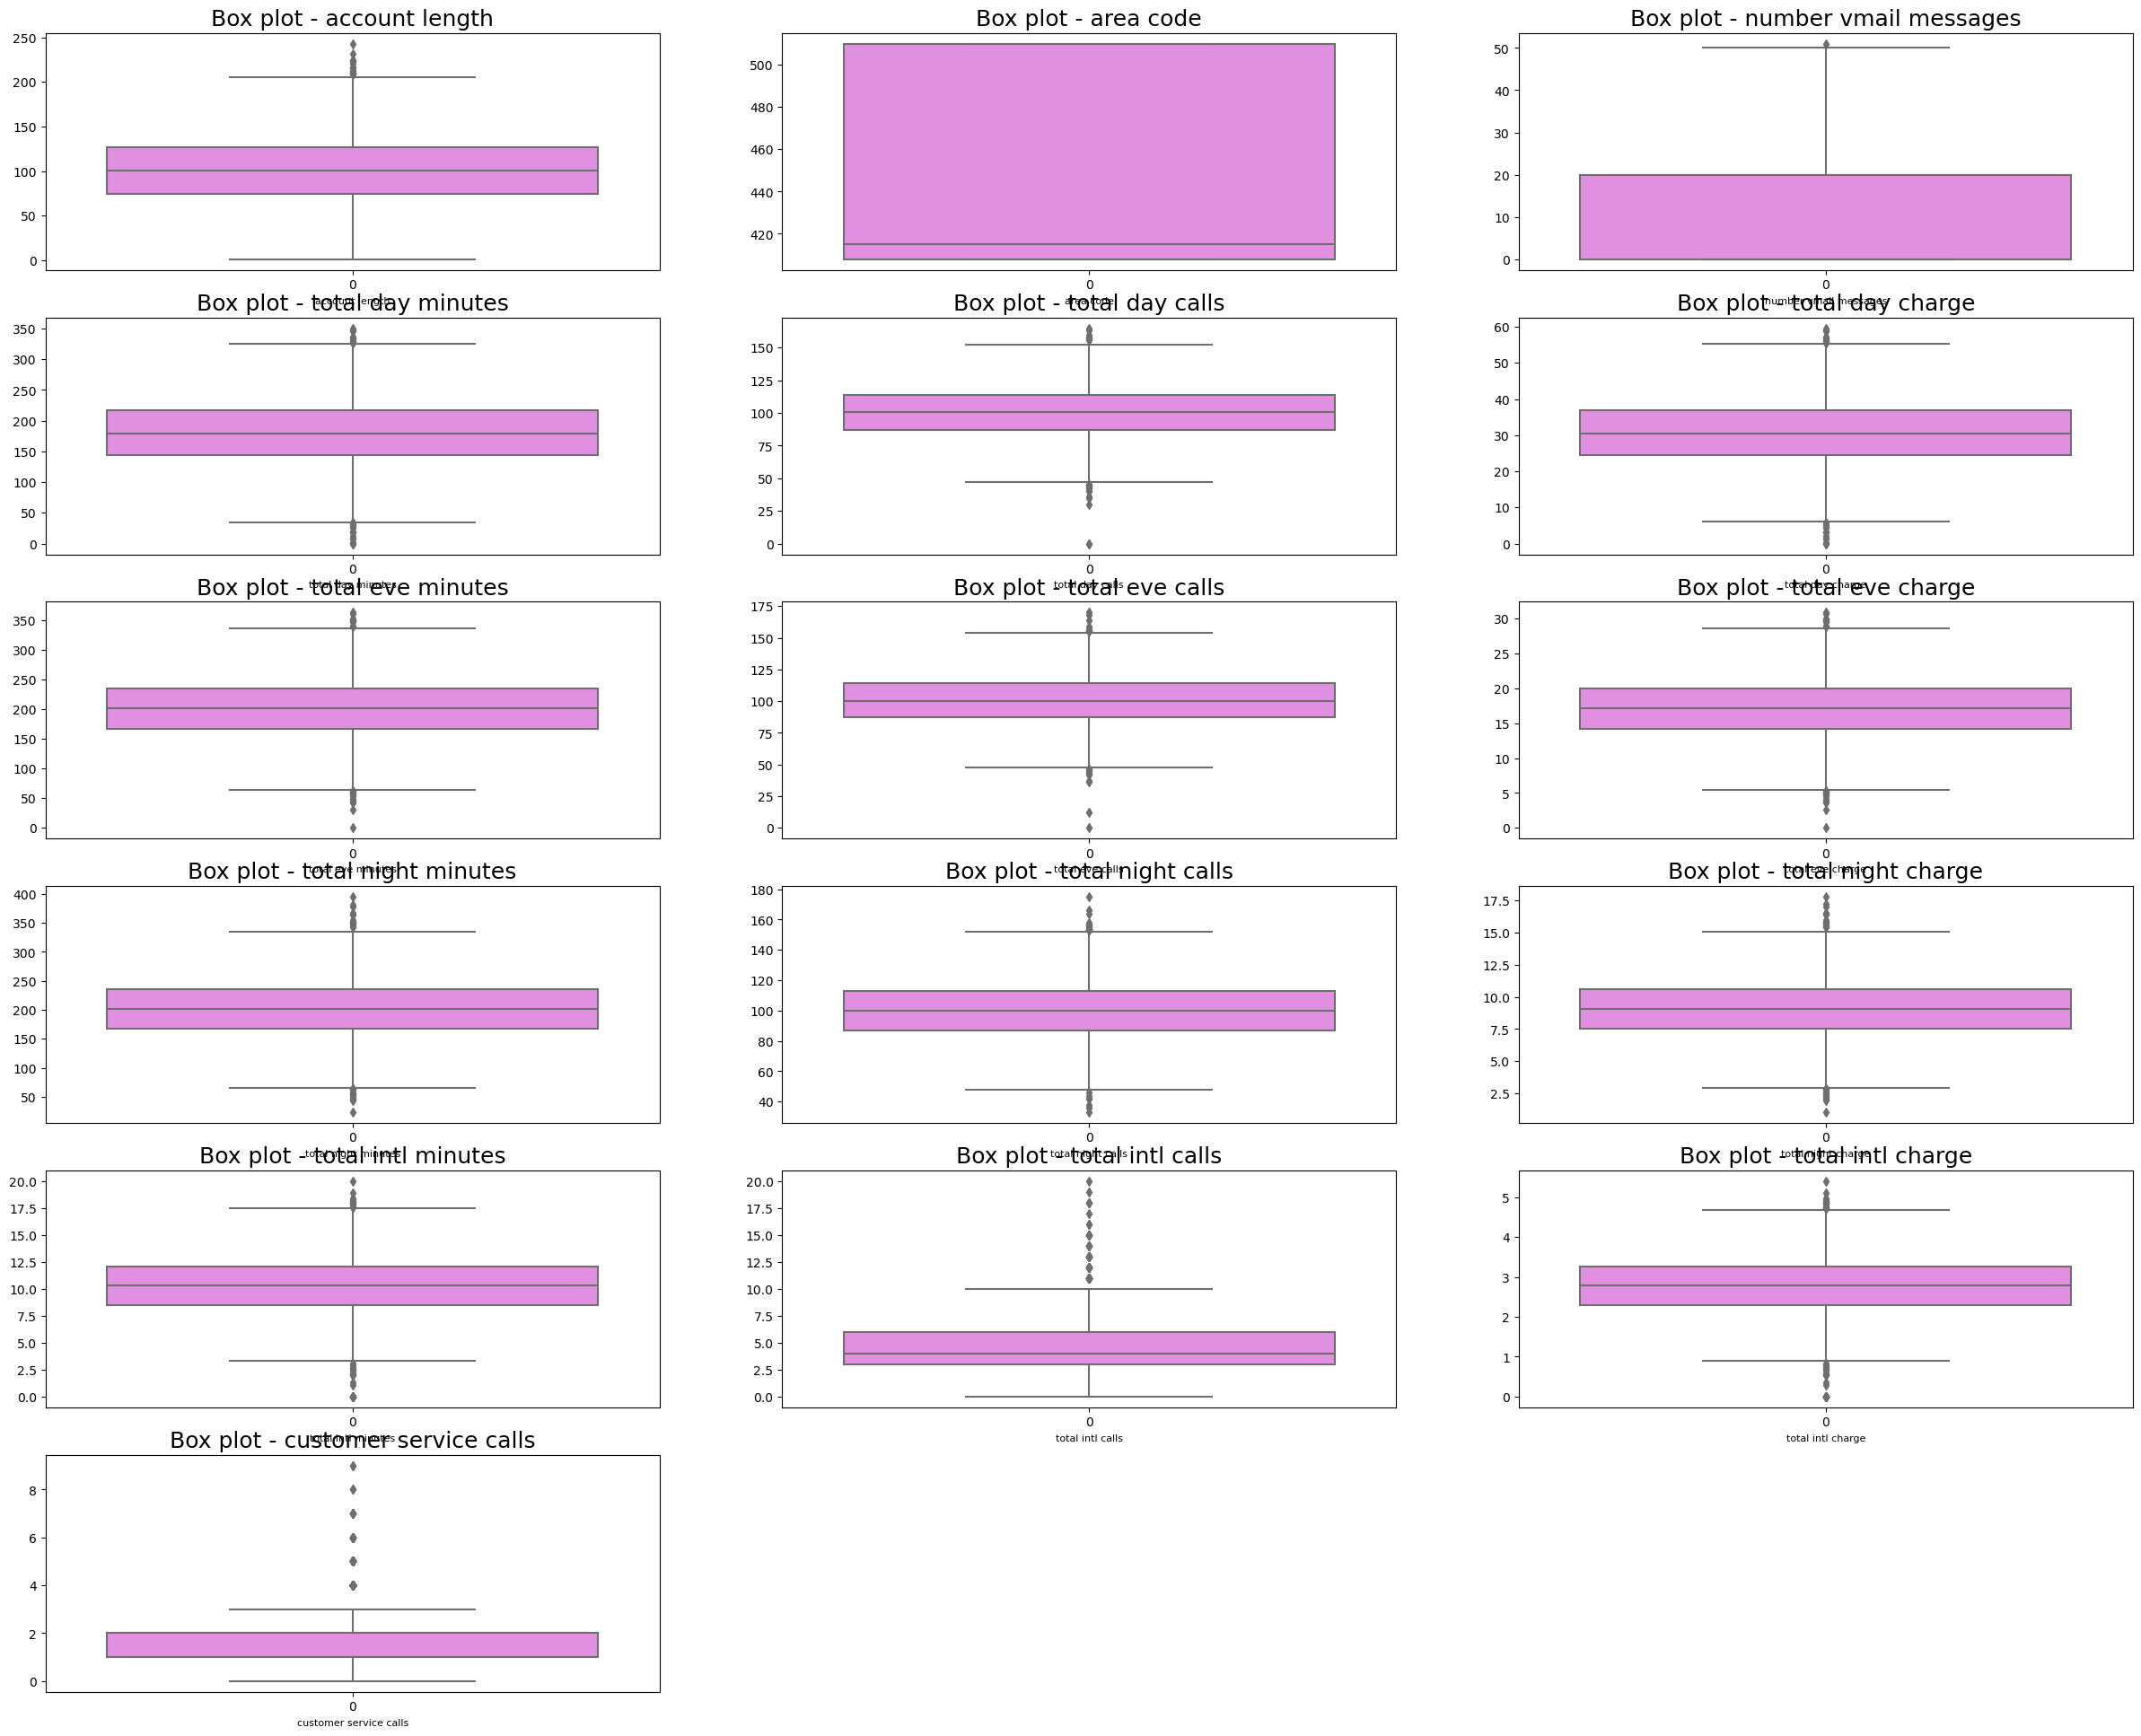

In [122]:
# Check for outliers
# Create a list of columns with numeric values
numeric_cols = churn_data.select_dtypes('number').columns

# Calculate number of rows and columns for subplots
num_rows = (len(numeric_cols) - 1) // 3 + 1
num_cols = min(len(numeric_cols), 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each numeric column
for i, column in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=churn_data[column], ax=axes[row, col], color='violet')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=18)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout


There are outliers but are not to to the extreme. 

In [123]:
# Check data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = churn_data[columns].dtypes
print(column_data_types)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


Area  code was encoded as numeric therefore we change it to categorical.

In [124]:
# Convert "State" column to categorical data type
churn_data["area code"] = churn_data["area code"].astype("str")
print(churn_data["area code"].dtype)

object


In [125]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
churn_data["churn"] = churn_data["churn"].astype(int)
print(churn_data["churn"].dtype)

int32


In [126]:
# Drop the 'phone number' column
churn_data.drop(columns=['phone number'], inplace=True)

Dropped the Phone number column as it is not relevant.

## Exploratory Data Analysis

Includes Univariate and Bivariate Analysis

1. Univariate Analysis

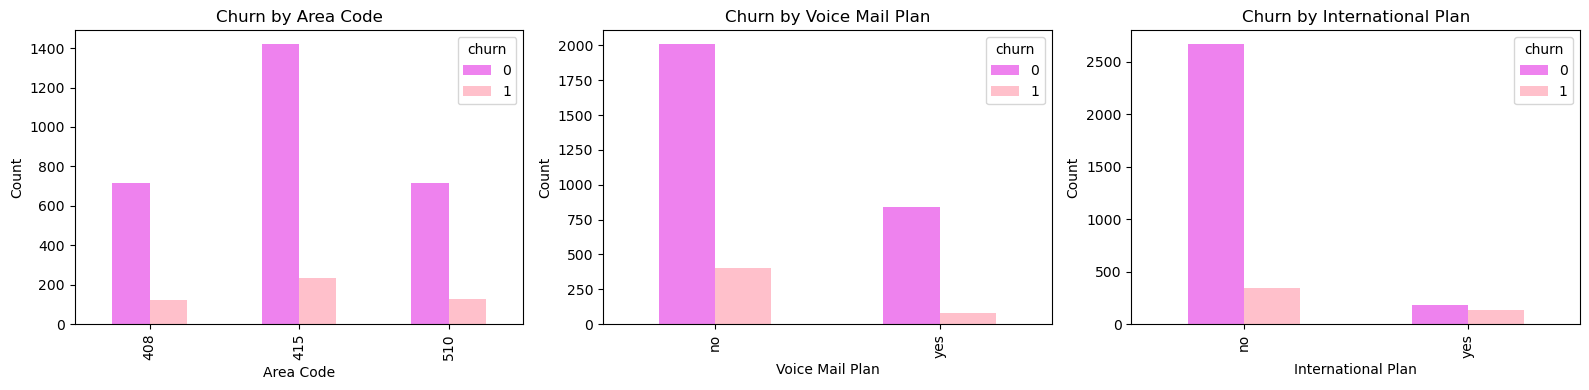

In [127]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Group by "area code" and "churn", then unstack and plot
churn_data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by "voice mail plan" and "churn", then unstack and plot
churn_data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by "international plan" and "churn", then unstack and plot
churn_data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

1. Analysis of Area Codes.
   - There is notable variation in churn rates across different area codes.
   - Area code 415 has the highest churn rate, whereas area code 408 has the lowest.
   - Although area codes 510 and 408 show fewer instances of churn, it is essential to consider the size of the customer base in each area code for a comprehensive understanding.

2. Assessment of International Plan.
   - SyriaTel offers an international calling plan to a customer base of under 500 users.
   - The churn rate among customers with this international plan closely matches the number of subscribers, indicating a significant risk of churn within this group.

3. Evaluation of Voice Mail Plan.
   - SyriaTel provides an optional voice mail plan to its customers.
   - A large number of customers have not subscribed to the voice mail plan.
   - Customers who have subscribed to the voice mail plan show a lower probability of churn compared to those who have not.


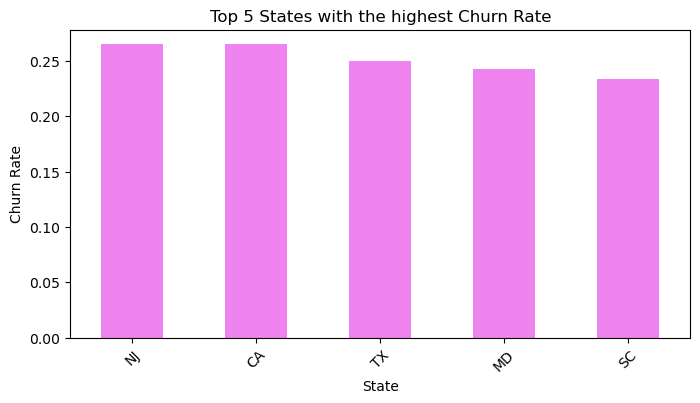

In [128]:
# Calculate churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)  # Change 5 to the desired number of states

# Plot the top states with the highest churn rate
plt.figure(figsize=(8, 4))
top_states_churn.plot(kind='bar', color='violet')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the highest churn rate are: New Jersey, California, Texas, Maryland and South Carolina.

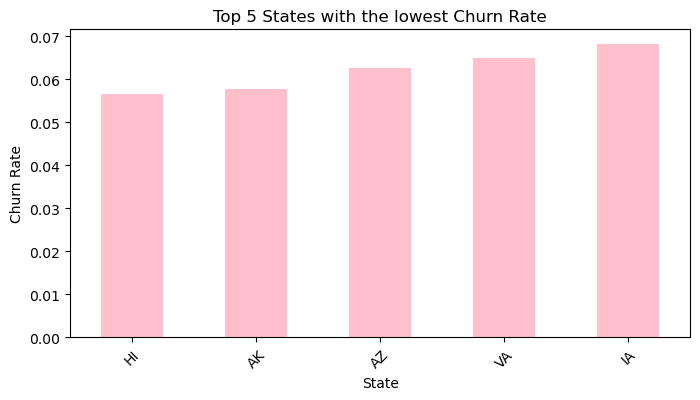

In [129]:
# Calculate churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values()

# Get the top states with the lowest churn rate
bottom_states_churn = state_churn_rate.head(5)  # Change 5 to the desired number of states

# Plot the top states with the lowest churn rate
plt.figure(figsize=(8, 4))
bottom_states_churn.plot(kind='bar', color='pink')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the low churn rates are Hawaii, Alaska, Arizona, Virginia, Louisiana.

2. Bivariate Analysis

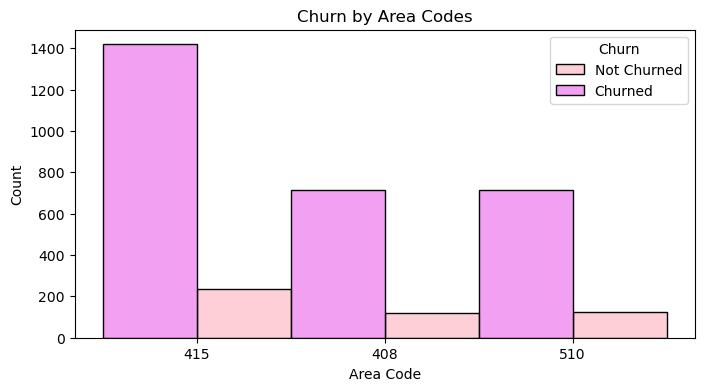

There are 3 area codes: 408, 415, 510 represented as 0, 1, 2


In [130]:
# Define the colors
colors = ['violet', 'pink']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot churn by area codes
plt.figure(figsize=(8, 4))
sns.histplot(data=churn_data, x='area code', hue='churn', multiple='dodge', palette=colors)

# Add a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Title
plt.title('Churn by Area Codes')

# Show plot
plt.show()

print('There are 3 area codes: 408, 415, 510 represented as 0, 1, 2')


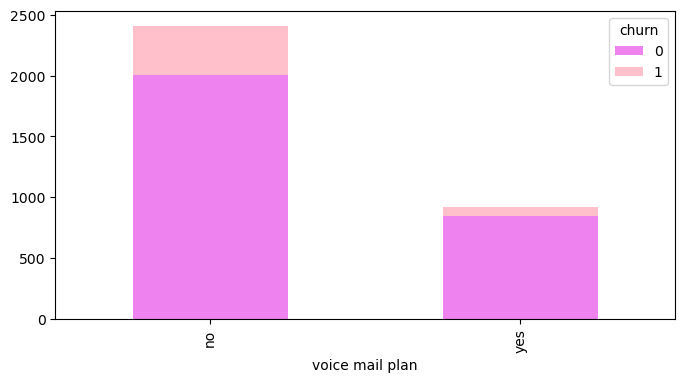

The percentage of customers subscribed to the voice mail plan is 27.66%
The percentage of subscribed customers who churned with voice mail plan is 8.68%


In [131]:
#function for diff plan
def churn_vs_plan(data, plan_column):
    # Plotting the churn vs plan
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(8,4))
    plt.show()

    # Calculating the percentage of customers subscribed to the plan
    total_customers = len(data)
    total_subscribed = sum(data[plan_column] == 'yes')
    percent_subscribed = (total_subscribed / total_customers) * 100
    print('The percentage of customers subscribed to the {} is {:.2f}%'.format(plan_column, percent_subscribed))

    # Calculating the percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percent_churned_with_plan = (churned_with_plan / total_subscribed) * 100
    print('The percentage of subscribed customers who churned with {} is {:.2f}%'.format(plan_column, percent_churned_with_plan))
# voice mail plan
churn_vs_plan(churn_data,'voice mail plan')

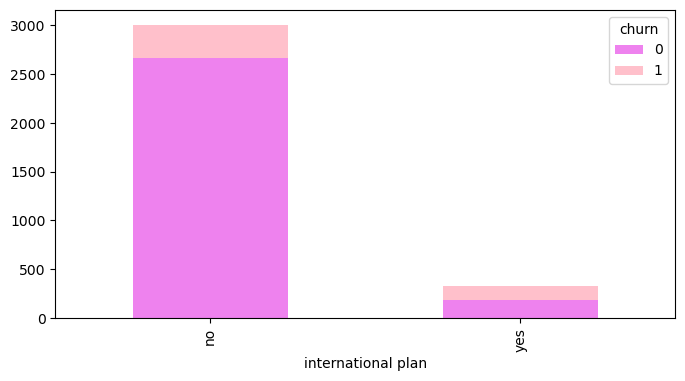

The percentage of customers subscribed to the international plan is 9.69%
The percentage of subscribed customers who churned with international plan is 42.41%


In [132]:
churn_vs_plan(churn_data,'international plan')

# Data Processing 